# Full ML pipeline

### what is an ML pipeline?
an ML pipeline is the complete process of building a machine learning model 

- data loading
- data cleaning and preprocessing
- exploratary data analysis (EDA)
- feature selection / engineering
- model building
- model evaluation
- making predictions
- think of it like cooking
- you collect ingredients => data loading
- clean them => data cleaning
- test and explore flavours=> EDA
- choose important ingredients => feature selections
- cook the dish => model building
- taste test => evaluation
- serve the dish => predictions

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## load dataset

In [124]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## understand data

In [125]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [126]:
print(titanic.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [127]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#### check datatypes, missing values, and got a quick overview

## Data Cleaning

In [128]:
# drop columns with too many missing values
titanic.drop(['deck','embark_town'],axis=1,inplace=True)

In [129]:
# fill missing age with median
titanic['age'].fillna(titanic['age'].median(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_110024\2105830667.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(),inplace=True)


In [130]:
# drop remaining rows with null values
titanic.dropna(inplace=True)

# EDA exploratary data analysis

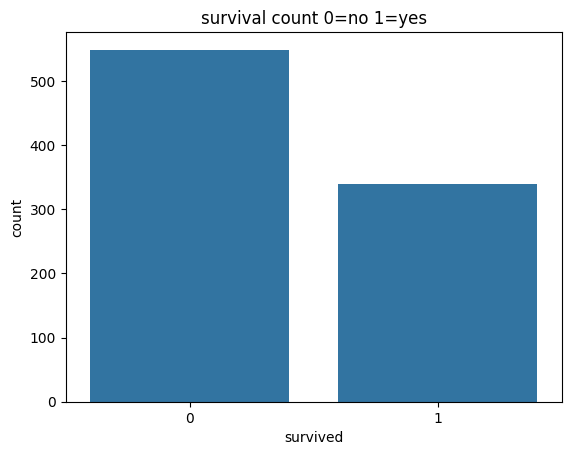

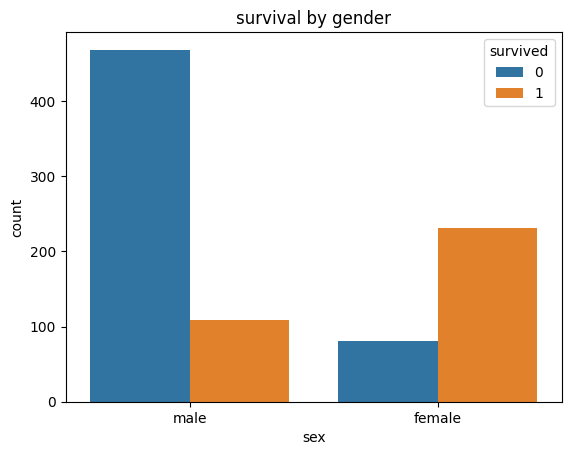

In [131]:
sns.countplot(x='survived',data=titanic)
plt.title('survival count 0=no 1=yes')
plt.show()
sns.countplot(x='sex',hue='survived',data=titanic)
plt.title ('survival by gender')
plt.show()

### features selection and encoding

In [132]:
features=['pclass','sex','age','fare','embarked']
target=['survived']
le=LabelEncoder()
titanic['sex']=le.fit_transform(titanic['sex'])
titanic['embarked']=le.fit_transform(titanic['embarked'])
X=titanic[features]
y=titanic[target]

#### categorical features like sex and embarked converted to numbers

### feature scaling 

In [133]:
scalar=StandardScaler()
X[['age','fare']]=scalar.fit_transform(X[['age','fare']])

C:\Users\dell\AppData\Local\Temp\ipykernel_110024\3342605513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age','fare']]=scalar.fit_transform(X[['age','fare']])


### train test split

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2,random_state=42)

#### model building and logistic regression

In [135]:
model=LogisticRegression(max_iter=1000) 
model.fit(X_train,y_train)

C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Logistic regression for binary classification(survived or not)

In [136]:
# Model evaluation

In [137]:
y_pred= model.predict(X_test)
print("accuracy score",accuracy_score(y_test,y_pred))

accuracy score 0.7752808988764045


In [138]:
print(" classification report ",classification_report(y_test,y_pred))

 classification report                precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [139]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n", cm)


confusion matrix
 [[86 23]
 [17 52]]


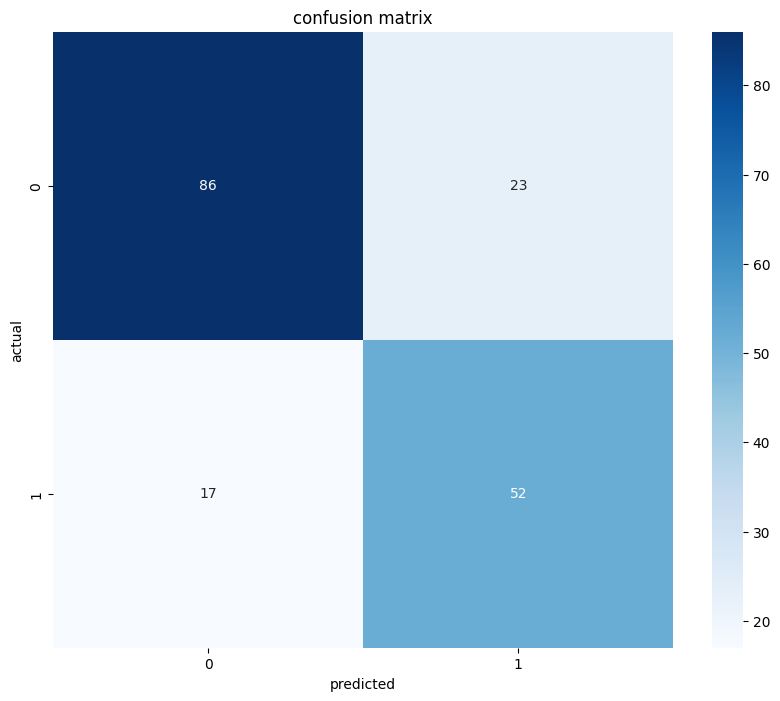

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues' )
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## Make Predictions

In [144]:
le_sex= LabelEncoder()
le_sex.fit(['male','female']) # Or fit it on the actual data column : df['sex']

le_embarked = LabelEncoder()
le_embarked.fit(['s','c','q']) # or df["embarked"]

sample= pd.DataFrame({
        'pclass': [3],
        'sex': le_sex.transform(['male']),
        'age': scalar.transform([[25,0]])[0][0],
        #only age and fare are scaled
        'fare': scalar.transform([[0,50]])[0][1],
        'embarked': le_embarked.transform(['s'])
    }
)
pred= model.predict(sample)
print("survival prediction (1= Survived , 0=Not Survived):",pred[0])

survival prediction (1= Survived , 0=Not Survived): 0


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Summary of Pipeline Steps
- Data Loading
- Data Cleaning (handle nulls, remove unwanted columns)
- EDA with Visuals
- Feature Selection & Encoding
- Scaling Features
- Model Training
- Evaluation Metrics
- Predictions